<a href="https://colab.research.google.com/github/quarcs-lab/book-2020-spatial-analysis-methods-and-practice/blob/master/Lab1/Lab1_GettingToKnowDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 01: Getting to know the dataset with Python

## Install libraries

In [0]:
!pip install -q geopandas
!pip install -q libpysal
!pip install -q mapclassify
!pip install -q splot
!pip install -q legendgram
!pip install -q esda
!pip install -q inequality
!pip install -q giddy
!pip install -q ipywidgets 

## Load libraries

In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import palettable.matplotlib as mplpal
%matplotlib inline

from libpysal import examples
from libpysal.weights.contiguity import Queen
from libpysal import weights

import mapclassify

from legendgram import legendgram

import splot
from splot.esda import plot_moran
from splot.esda import moran_scatterplot
from splot.esda import lisa_cluster
from splot.esda import plot_local_autocorrelation
from splot.esda import plot_moran_bv_simulation, plot_moran_bv

import esda
from esda.moran import Moran
from esda.moran import Moran_Local
from esda.moran import Moran_BV, Moran_Local_BV

from giddy.directional import Rose

from ipywidgets import interact, fixed
import ipywidgets as widgets

from scipy.stats.kde import gaussian_kde

import os

#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
##plt.style.use('seaborn-darkgrid')
#plt.style.use('seaborn-dark')
#plt.style.use('bmh')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data prepration

### Import datasets

In [3]:
# Clone entire Github repository
!git clone -l -s git://github.com/quarcs-lab/book-2020-spatial-analysis-methods-and-practice.git cloned-repo
%cd cloned-repo
# Show contents of repo
#!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 423, done.
remote: Counting objects: 100% (423/423), done.
remote: Compressing objects: 100% (251/251), done.
remote: Total 423 (delta 165), reused 408 (delta 156), pack-reused 0
Receiving objects: 100% (423/423), 14.80 MiB | 30.37 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/cloned-repo


In [4]:
# read shapefile 
gdf = gpd.read_file("/content/cloned-repo/Lab1/GeoDa/CityGeoDa.shp")
gdf

,Municipali,PostCode,Population,SecondaryE,University,Phd_Master,Income,Insurance,Rent,Expenses,Area,Regimes,Density,Foreigners,Owners,geometry
0,ATHENS,10434,7063,51.28,19.82,1.81,15451.63,212.98,632.04,178.583919,3.322201e+05,2,0.02,28.67,36.28,"POLYGON ((475913.572 4205144.087, 475915.290 4..."
1,ATHENS,10435,4900,42.29,9.00,0.90,10992.85,118.41,623.70,79.890622,2.805819e+05,2,0.02,22.04,37.41,"POLYGON ((474945.127 4203977.328, 474949.878 4..."
2,ATHENS,10436,3221,45.76,11.27,0.56,10294.89,108.40,624.93,72.294562,2.079681e+05,2,0.02,35.70,30.22,"POLYGON ((475200.579 4204194.646, 475202.300 4..."
3,ATHENS,10440,10919,51.41,13.75,0.96,13460.39,116.00,610.38,98.658519,2.406351e+05,2,0.05,29.01,34.68,"POLYGON ((475457.791 4205205.622, 475539.603 4..."
4,ATHENS,10442,8036,46.04,8.55,0.54,12498.30,146.16,492.59,99.116531,1.315989e+06,2,0.01,12.88,49.19,"POLYGON ((473381.623 4204847.057, 473360.125 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,ATHENS,11743,17220,43.60,22.03,2.93,12527.34,157.93,610.24,115.396884,6.008519e+05,2,0.03,12.04,43.48,"POLYGON ((475917.556 4201186.144, 475877.202 4..."
86,ATHENS,10559,34,61.76,26.47,0.20,19499.93,278.10,443.64,163.158423,5.778352e+04,1,0.00,79.41,0.00,"POLYGON ((476013.974 4203304.591, 475991.099 4..."
87,ATHENS,10561,3,33.33,33.33,0.10,20758.11,495.44,740.08,397.968803,5.906011e+04,1,0.00,81.76,50.00,"POLYGON ((476464.923 4203062.060, 476428.206 4..."
88,ATHENS,10563,220,33.18,11.37,0.91,23376.21,560.18,1078.84,255.986658,9.417685e+04,1,0.00,66.80,32.26,"POLYGON ((475916.064 4202910.601, 475924.842 4..."


## Decriptive statistics

### Using mapclassify with geopandas

Useful reference [here](https://github.com/pysal/mapclassify/blob/master/notebooks/plot.ipynb)

In [5]:
mapclassify.UserDefined(gdf["Population"], bins=[2000, 5000, 15000, 20000])

UserDefined                 

      Interval         Count
----------------------------
[    3.00,  2000.00] |    24
( 2000.00,  5000.00] |     9
( 5000.00, 15000.00] |    40
(15000.00, 20000.00] |    12
(20000.00, 25933.00] |     5

In [6]:
mapclassify.NaturalBreaks(gdf["Population"], k=4)

NaturalBreaks               

      Interval         Count
----------------------------
[    3.00,  4247.00] |    32
( 4247.00, 10099.00] |    21
(10099.00, 16739.00] |    25
(16739.00, 25933.00] |    12

In [0]:
nb = mapclassify.NaturalBreaks(gdf.Population, k=4)

In [8]:
mapclassify.BoxPlot(gdf["Population"])


BoxPlot                       

       Interval          Count
------------------------------
(     -inf, -15796.12] |     0
(-15796.12,   1766.25] |    23
(  1766.25,   8243.50] |    22
(  8243.50,  13474.50] |    22
( 13474.50,  31036.88] |    23

In [9]:
mapclassify.EqualInterval(gdf["Population"])

EqualInterval               

      Interval         Count
----------------------------
[    3.00,  5189.00] |    33
( 5189.00, 10375.00] |    20
(10375.00, 15561.00] |    21
(15561.00, 20747.00] |    11
(20747.00, 25933.00] |     5

In [10]:
mapclassify.FisherJenks(gdf["Population"], k=5)

FisherJenks                 

      Interval         Count
----------------------------
[    3.00,  4247.00] |    32
( 4247.00,  9426.00] |    18
( 9426.00, 14746.00] |    23
(14746.00, 19642.00] |    12
(19642.00, 25933.00] |     5

In [11]:
mapclassify.Quantiles(gdf["Population"], k=5)

Quantiles                   

      Interval         Count
----------------------------
[    3.00,  1420.40] |    18
( 1420.40,  6260.20] |    18
( 6260.20, 10594.40] |    18
(10594.40, 14562.80] |    18
(14562.80, 25933.00] |    18

In [12]:
 mapclassify.Percentiles(gdf["Population"], pct=[33, 66, 100])

Percentiles                 

      Interval         Count
----------------------------
[    3.00,  3814.71] |    30
( 3814.71, 11554.56] |    29
(11554.56, 25933.00] |    31

## Choroplets

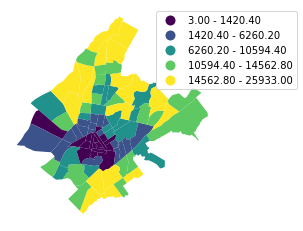

In [13]:
ax = gdf.plot(column="Population", scheme='QUANTILES', legend=True)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((1.4,1))

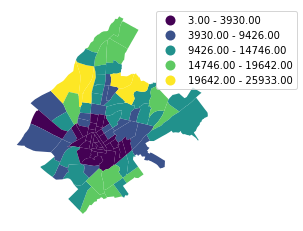

In [14]:
ax = gdf.plot(column="Population", scheme='NaturalBreaks', legend=True)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((1.4,1))

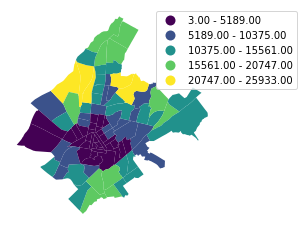

In [15]:
ax = gdf.plot(column="Population", scheme='EqualInterval', legend=True)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((1.4,1))

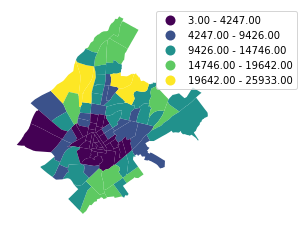

In [16]:
ax = gdf.plot(column="Population", scheme="FisherJenks", legend=True)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((1.4,1))

## Using legendgrams

Useful reference [here](https://github.com/pysal/legendgram/blob/master/examples/examples.ipynb)

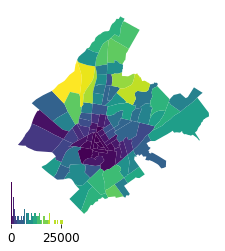

In [17]:
# Using legendgrams
ax = gdf.plot("Population")
ax.axis('off')
legendgram(plt.gcf(), # grab the figure, we need it
           ax, # the axis to add the legend
           gdf.Population, # the attribute to map
           np.percentile(gdf.Population, np.arange(10,110,10)), # the breaks to induce color differences on
           mplpal.Viridis_10 # the palette to use
          )


# Nepal Aid data

## Shapefile: NepalAid

- File name and extension: [NapalAid.zip](https://github.com/ds777/sample-datasets/blob/master/NepalAid.zip.zip?raw=true)

### Data information

Observations = 75 districts

Variables = 26. One cross-section based on data for years between 1991 and 2013

- DepEcProv:  Deprivation in economic provisioning
- PovIndex:	  Human Poverty Index
- PCInc:	    Per Capita Income
- PCIncPPP:	  Per Capita Income PPP
- PCIncMP:  	Per capita income, Rs. at market price
- MalKids:	  Percentage of children under age five who are malnourished
- Lif40:	    Percentage of People not expected to survive age 40
- NoSafH20:  	Percentage without safe water
- Population:	Population
- BoyG1_5:	  Number of Boys Enrolled in Grade 1-5 (2012-2013)
- GirlG1_5:	  Number of Girls Enrolled in Grade 1-5 (2012-2013)
- KIDS1_5:	  Number of Children Enrolled in Grade 1-5 (2012-2013)
- SchoolCnt: 	Number of Schools (2012-2013)
- SCHLPKID:	  Number of Schools per child (in thousands) (2012-2013)
- SCHLPPOP:	  Number of Schools per population (in thousands) (2012-2013)
- AD_ILLIT:	  Adult illiteracy rate (2011)
- AD_ILGT50:  Dummy variable with value of 1 if adult illiteracy rate >50% (2011)
- VotNum:   	Number of Voters (lunar years 2047-2063, approx. 1991 to 2006)
- TotEcFMS: 	Total economy including financial intermediation service indirectly measured (total value added)
- XXCAmt:	    Project Sector Committed Amount: XX = sector (see above)	Project Data from AidData Aggregated to District
- XXDAmt:	    Project Sector Distributed Amount: XX = sector: Agriculture, Business Banking, Communication, Conflict Resolution, Budget Support + Finance, Education, Energy, Environment, Forestry, Gov + Civil Society, Health, Humanitarian Aid, Industry, Multi-Sector, Social Infrastructure, Tourism, Transport + Storage, Water Sanitation, Total


### Source:

https://geodacenter.github.io/data-and-lab/nepal/


### Download link:

https://github.com/ds777/sample-datasets/blob/master/NepalAid.zip.zip?raw=true




## Load datset

Be careful! column names are imported as lower case

In [18]:
NepalAid = gpd.read_file("/content/cloned-repo/Lab1/GeoDa/NepalAid.shp")
NepalAid

,id,id_1,name_1,id_2,name_2,id_3,district,depecprov,povindex,pcinc,pcincppp,pcincmp,malkids,lif40,nosafh20,population,boyg1_5,girlg1_5,kids1_5,schoolcnt,schlpkid,schlppop,ad_illit,ad_ilgt50,lon,lat,geometry
0,1.0,0.0,None,8.0,Dhaualagiri,60.0,Baglung,27.01,27.33,354.0,573.0,25613.0,42.9,8.52,11.12,250065.0,29144.0,31123.0,60267.0,554.0,9.1924,2.215424,34.46,0.0,83.252444,28.347313,"POLYGON ((83.10834 28.62020, 83.10560 28.60976..."
1,2.0,0.0,None,8.0,Dhaualagiri,61.0,Mustang,31.51,31.16,1189.0,1922.0,85957.0,54.7,12.02,8.32,11585.0,784.0,806.0,1590.0,70.0,44.0252,6.042296,38.65,0.0,83.859902,28.981165,"POLYGON ((83.99726 29.31675, 84.00000 29.31576..."
2,3.0,0.0,None,8.0,Dhaualagiri,62.0,Myagdi,30.03,28.54,636.0,1028.0,45986.0,47.5,7.27,12.56,109598.0,9035.0,9033.0,18068.0,273.0,15.1096,2.490921,34.84,0.0,83.461955,28.552960,"POLYGON ((83.50688 28.79306, 83.51024 28.78809..."
3,4.0,0.0,None,8.0,Dhaualagiri,63.0,Parbat,21.84,24.62,627.0,1013.0,45289.0,26.2,6.11,17.47,145657.0,11202.0,11280.0,22482.0,369.0,16.4131,2.533349,32.43,0.0,83.680893,28.211019,"POLYGON ((83.70261 28.39837, 83.70435 28.39452..."
4,5.0,1.0,Central,1.0,Bagmati,1.0,Bhaktapur,22.58,19.43,854.0,1379.0,61686.0,26.9,3.31,18.25,296705.0,16533.0,15271.0,31804.0,355.0,11.1621,1.196475,21.87,0.0,85.442906,27.677353,"POLYGON ((85.52173 27.71822, 85.52359 27.71375..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71.0,5.0,West,14.0,Lumbini,70.0,Arghakhanchi,27.24,27.37,562.0,909.0,40635.0,31.0,7.71,23.48,196873.0,18893.0,18594.0,37487.0,451.0,12.0308,2.290817,34.43,0.0,83.081325,27.908351,"POLYGON ((83.02333 28.10508, 83.02967 28.09924..."
71,72.0,5.0,West,14.0,Lumbini,71.0,Gulmi,27.36,27.42,465.0,752.0,33625.0,43.3,8.26,11.42,279005.0,24865.0,24999.0,49864.0,615.0,12.3335,2.204262,34.42,0.0,83.309026,28.093708,"POLYGON ((83.19185 28.26453, 83.20638 28.25558..."
72,73.0,5.0,West,14.0,Lumbini,73.0,Nawalparasi,26.01,27.99,716.0,1157.0,51742.0,38.9,8.09,13.11,638836.0,52014.0,51413.0,103427.0,706.0,6.8261,1.105135,36.25,0.0,83.955312,27.633575,"POLYGON ((84.10302 27.86387, 84.09755 27.85927..."
73,74.0,5.0,West,14.0,Lumbini,74.0,Palpa,28.42,25.23,609.0,985.0,44031.0,35.9,7.25,20.93,258842.0,22180.0,21734.0,43914.0,496.0,11.2948,1.916227,29.18,0.0,83.625682,27.817122,"POLYGON ((83.37988 27.95869, 83.37875 27.95583..."


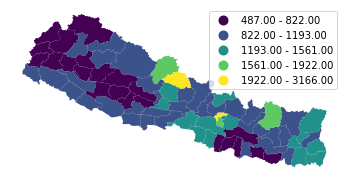

In [22]:
ax = NepalAid.plot(column="pcincppp", scheme='NaturalBreaks', legend=True)
ax.set_axis_off()


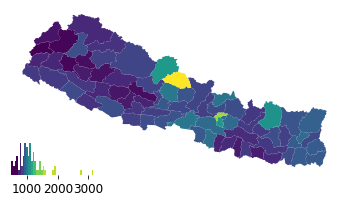

In [23]:
# Using legendgrams
ax = NepalAid.plot("pcincppp")
ax.axis('off')
legendgram(plt.gcf(), # grab the figure, we need it
           ax, # the axis to add the legend
           NepalAid.pcincppp, # the attribute to map
           np.percentile(NepalAid.pcincppp, np.arange(10,110,10)), # the breaks to induce color differences on
           mplpal.Viridis_10 # the palette to use
          )